# DIDComm messenger

Данная презентация оформлена в **непривычной форме**, а именно в ней присутствует программный код, который можно запускать, отлаживать, редактировать **прямо внутри документа**. По нашему замыслу это **сократит время** технической оценки и не отнимет презентационной части.

Весь материал следует следующей логике:
 1. Мы говорим **не** про **программный продукт**, а про **технологии**, центральной из которой будет **DIDComm**. `Sirius Messenger` - это рабочая реализация, демонстрирующая живые кейсы
 2. В документе будет много материала про **KYC** и идентификацию пользователя/IoT, мы будем проводить сравнения с типовым решением [Mobile Connect](https://mobileconnect.io/) для **отстройки** от этой технологии, для демонстрации различий в пользу больших гибкости и безопасности
 3. Примеры будут про бизнес во-первых, про технологии во-вторых
 
 По нашему мнению, при росте доли цифровых услуг, телекоммунмкационный бизнес позволит построить устойчивый баланс из 3-х участников в [TOIP](https://trustoverip.org/wp-content/toip-model/)
  1. Государство с его регуляторной ролью
  2. Онлайн Бизнес и пользователи, которые формируют BigData, требующий регулятора
  3. Телеком должен обслуживать инфраструктуру цифры для бизнеса, пользователей, регулятора. Технологии о которых мы будем говорить, требуют **инфраструктуры**, которую бы поддерживал 3 **независимый** усастник. **Независимый (условно независимый)** статус позволяет **увидеть** ключевые **болевые точки** других участников цифровой трансформации и стать **драйвером** трансформации

In [2]:
import iplantuml


Writing output for /opt/conda/notebooks/59dc382c-c114-46da-af5d-08b0db574089.uml to 59dc382c-c114-46da-af5d-08b0db574089.svg


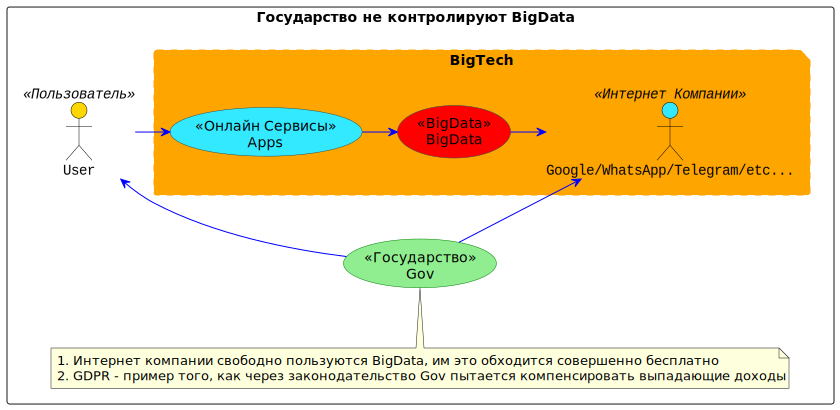

In [3]:
%%plantuml
@startuml

skinparam actor {
  BorderColor black
  FontName Courier
  BackgroundColor<< Пользователь >> Gold
  BackgroundColor<< Анонимы >> Gold
  BackgroundColor<< Интернет Компании >> #33E9FF
}
skinparam usecase {
  BorderColor DarkSlateGray
  BackgroundColor<< Государство >> LightGreen
  BorderColor<< Государство >> Green
  BackgroundColor<< BigData >> Red 
  BackgroundColor<< Онлайн Сервисы >> #33E9FF 
  ArrowColor Blue
}
rectangle Today as "Государство не контролируют BigData" {
    User << Пользователь >>
    file BigTech #orange;line:orange;line.dashed;text:green {
        :Google/WhatsApp/Telegram/etc...: as Co << Интернет Компании >>
        (Apps) << Онлайн Сервисы >>
        (BigData) << BigData >>
    }
    (Gov) << Государство >>
    User -> (Apps)
    Apps -> (BigData)
    BigData -> Co
    User <-- Gov
    Co <-- Gov
    note bottom
     1. Интернет компании свободно пользуются BigData, им это обходится совершенно бесплатно
     2. GDPR - пример того, как через законодательство Gov пытается компенсировать выпадающие доходы 
    end note
}

@enduml



 ## Новостной фон
 1. Еврокомиссия инициирует переход на цифровые документы и строит [Identity Framework для резидентов, туристов, бизнеса](https://ec.europa.eu/commission/presscorner/detail/en/ip_21_2663)
 2. Евросоюз будет развивать DMA (закон о цифровых рынках) с упором на [интероперабельность](https://techcrunch.com/2022/03/24/dma-political-agreement/) **мессенджеров**. По утверждению законодателей, это повысит конкуренцию и исключит монополию **BigTech**, открыв дорогу компаниям малой капитализации.
 3. Цифровизация повышает стоимость [данных KYC](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3218761)
 4. С нового 2023 года [электронное выставление счетов](https://revuefiduciaire.grouperf.com/article/3889/hb/20210330173740412.html) для борьбы с моошенничествами с НДС (бюджет ЕС недополучает порядка 147 миллиардов евромв год)
 
 Общий фон новостей подсказывает, что речь идет **не только** (и не столько) о **сохранности данных** граждан, сколько о **цифровом сувиренитете**, который в конечном счете вернется не только через **налоговые поступления**, но и через **повышение разнообразия и качества** онлайн сервисов и услуг через более **справедливую конкуренцию** и **прозрачность** государственных услуг
 
 **Цифровой сувиренитет**, если присмотреться к мировой практике, достигается 2 способами:
 1. Китайский вариант - закрыть интернет и замкнуть внутри государства. Сохранение цифры возможно только если государство смогло построить внутри себя свои Google, WhatsApp, Amazon и проч.
 2. Европейский вариант - ограничить доступ к BigData сначала через **GDPR** и штрафы *BigTech*, а затем через цифровой фреймворк (**DIDComm**) отделить значимую часть (личные и коммерческие данные) от незначимой (да *BigTech* продолжает копить *BigData*, но они уже расщеплены), поставив *BigTech* нв одни условия с *компаниями малой капитализации*.
 
 #### **DIDComm** - это набор протоколов интероперабельности для старта **цифровой трансформации**, которая пройдет быстрее при поддержке телекома.
 
 _________________
 
 #### Со стороны пользователя это выглядит так 
 
 &emsp; &emsp; &emsp; <img src="images/usercentric.png" width=400 height=400 /> 
 
 *Все идентификационные данные хранятся в одном месте (Хранилище на персональном устройстве или в датацентре под защитой надежного телеком-оператора)*
 
 _________________
 
 #### Со стороны телекома это выглядит так  
 
 &emsp; &emsp; &emsp;<img src="images/toip.png" height=200 />
 
 *Телеком обслуживает службы нижних слоев, позволяя выстраивать цифровую экономику на верхних слоях*
 


> ### Отличие от аналогичных MobileConnect решений
> - [Mobile Connect](https://mobileconnect.io/) использует механизм идентификации по номеру телефона:
>  1. номер телефона как таковой ничего не дает для проведения процедуры **KYC**: если пользователь на сайте впервые, то сайту все равно надо запрашивать необходимые данные. **DIDComm** же позволяет запросить все необходимые данные из персонального личного хранилища (паспорт, вод.удостоверения, итп) без посредничество сторонних сервисов, потому что они там хранятся постоянно и полностью контролируются своим владельцем
>  2. номер телефона как идентификатор не удовлетворяет требованию законодательства, банк не даст кредит по номеру тлф, клиент должен ногами топать в отделение чтобы менеджер проверил его паспорт и провел скоринг. **DIDComm** позволяет предьявлять **VC** (Verifiable Credentials) - документы, заверенные ЭЦП органов, выдавших этот документ
>  3. Mobile Connect использует в качестве инфраструктуры сети **GSM**, старые поколения которых уязвимы для атак: [см. PDF](docs/gsm_attacks.pdf). **DIDComm** работает в режиме P2P с самого начала общения пользователя с системой по абсолютно независимому каналу связи - визуальному каналу через QR-код


In [5]:
import json
import asyncio
import logging
import threading
from time import sleep

import sirius_sdk
from IPython.display import display, Image
import ipywidgets as widgets


logging.getLogger().setLevel(logging.CRITICAL)
output = widgets.Output()
button = widgets.Button(description="Connect User")
display(button, output)
image_qr = None
invitation_url = None
invitation_pub_key = None
async_loop = asyncio.new_event_loop()
async_thread = threading.Thread(target=async_loop.run_forever)
async_thread.start()
P2P: sirius_sdk.Pairwise = None

# Онлайн сервис (сайт) работает через Wallet, который в этом примере обслуживается в облаке (например KzTelekon) но может обслуживаться локально в компании
cfg = sirius_sdk.Config().setup_cloud(
    server_uri='https://demo.socialsirius.com', 
    credentials='ez8ucxfrTiV1hPX99MHt/C/MUJCo8OmN4AMVmddE/sew8gBzsOg040FWBSXzHd9hDoj5B5KN4aaLiyzTqkrbD3uaeSwmvxVsqkC0xl5dtIc=', 
    p2p=sirius_sdk.P2PConnection(
            my_keys=('6QvQ3Y5pPMGNgzvs86N3AQo98pF5WrzM1h6WkKH3dL7f', '28Au6YoU7oPt6YLpbWkzFryhaQbfAcca9KxZEmz22jJaZoKqABc4UJ9vDjNTtmKSn2Axfu8sT52f5Stmt7JD4zzh'),
            their_verkey='6oczQNLU7bSBzVojkGsfAv3CbXagx7QLUL7Yj1Nba9iw'
        )
)


########################################################################################################################
############################ Поддержку DIDComm можно вставить в Legacy код за 10 минут #################################
########################################################################################################################
async def run():
    global image_qr
    global invitation_url
    global invitation_pub_key
    global P2P
    async with sirius_sdk.context(cfg):
        
        # Восстановим свою ЭЦП из секретной фразы
        my_did, my_key = await sirius_sdk.DID.create_and_store_my_did(seed='00000000000000000DEMO-CONNECTION')
        output.append_stdout(f'\nMy DID: {my_did}\t My Key: {my_key}')
        
        # Внутри QR помещается публичный ключ ЭЦП компании сайта, название компании, интернет-адрес P2P соединения 
        site_internet_address = [e for e in await sirius_sdk.endpoints() if e.routing_keys == []][0]
        output.append_stdout(f'\nMy Internet address: {site_internet_address.address}')
        invitation_pub_key = await sirius_sdk.Crypto.create_key()
        invitation = sirius_sdk.aries_rfc.Invitation(
            # Название компании
            label='DEMO Connection',
            # интернет-адрес P2P соединения
            endpoint=site_internet_address.address, 
            # публичный ключ ЭЦП компании
            recipient_keys=[invitation_pub_key]
        )
        invitation_url = 'https://messenger.socialsirius.com/en/invitation' + invitation.invitation_url
        qr_url = await sirius_sdk.generate_qr_code(invitation_url)
        # display(Image(url=qr_image, width = 250, unconfined=True))
        image_qr = Image(url=qr_url, width = 250, unconfined=True)
        
        # Теперь слушаем взходящие запросы
        listener = await sirius_sdk.subscribe(group_id='connections')
        output.append_stdout(f'\nListen incoming messages')
        async for event in listener:
            if isinstance(event.message, sirius_sdk.aries_rfc.ConnRequest) and event.recipient_verkey == invitation_pub_key:
                request: sirius_sdk.aries_rfc.ConnRequest = event.message
                output.append_stdout(f'\nSomebody with label: "{request.label}" wants establish P2P connection...')
                protocol = sirius_sdk.aries_rfc.Inviter(
                    me=sirius_sdk.Pairwise.Me(my_did, my_key),
                    my_endpoint=site_internet_address,
                    connection_key=invitation_pub_key
                )
                success, p2p = await protocol.create_connection(request)
                if success:
                    P2P = p2p
                    output.append_stdout(f'\nConnection with "{request.label}" was successfully established')
                else:
                    output.append_stdout(f'\nConnection with "{request.label}" has error: "{protocol.problem_report.explain}"')
            elif isinstance(event.message, sirius_sdk.aries_rfc.BasicMessage):
                output.append_stdout(f'\n\tReceived message: "{event.message.content}"')

########################################################################################################################
########################################################################################################################
########################################################################################################################



def on_button_clicked(b):
    with output:
        while image_qr is None:
            print('*')
            sleep(1)
        print(f'\nПриглашение:\n{invitation_url}\n')
        print(f'\nПубличный ключ приглашения: {invitation_pub_key}\n')
        print('===================== Отсканируйте QR в Sirius messenger ==============')
        display(image_qr)
        
# asyncio.ensure_future(run())
asyncio.run_coroutine_threadsafe(run(), async_loop)
button.on_click(on_button_clicked)

Button(description='Connect User', style=ButtonStyle())

Output()

## Разберем ситуацию, которая произошла
-----------------------

<table style="float:left;width:100%;">
    <tr>
        <td style="width:400px;">
            <ol style="font-size: 120%;">
                <li>
                    <span style="color: blue;">синим</span> цветом выделен телекоммуникационный слой, который мы только что реализовали.
                </li> 
                <li>
                    <span style="color: red;">красным</span> выделен слой, в котором мы получаем возможность работать теперь - это слой, в котором будет вытсраиваться доверие на цифровом уровне
                </li> 
                <li>
                    <b>Нужно</b> заметить, слой <b>Peer Connections</b> работает с использованием <b>ЭЦП</b> ключей, а значит, установка доверия в цифровой среде будет иметь <b>юридическую значимость</b>
                </li>
                <li>
                    <b>Peer</b> - это не только человек, но и любой участник digital: IoT,бизнес,цифровой двойник и т.п.
                </li>
            </ol>
        </td>
        <td>
            <img src="images/toip_levels.png" width=400 height=400 /> 
        </td>
    </tr>
</table>


## Выстраивание доверия.
-----------------------
Доверие строится на цепочках доверенных посредников. Давайте разберем подробнее роли:
  1. **Issuer**: Доверенный участник (например Полиция или Налоговая)
  2. **Prover**: владелец цифрового кошелька (конфиденциального хранилища) для хранения документов
  3. **Verifier**: участник, который хочет выстроить доверие с Prover
  
**Важно заметить**, что цепочка доверенных участников (*Issuer*) выбирается каждым *Verifier* самостоятельно в данный момент времени. 
Например:
 1. в МИС (сайт клиники) для записи на прием принимают как удостоверение гражданина, так и вод.удостоверение или студенческий
 2. в Полиции при выдаче удостоверения более жесткие ьребования: только паспорт гражданина и справка об окончании курсов одной из лицензированных школ
 3. на выборах сайт избир. комиссии принимает только удостоверения гражданина и биометрию. Вопрос биометрии никем не решен полностью и мы покажем как Messenger может помочь с этим


In [6]:
assert cfg is not None, 'You must initialize SDK at first'
assert async_loop is not None, 'Initialize schedulers at first on steps above...'
from sirius_sdk.agent.wallet.abstract.ledger import NYMRole
from IPython.display import display, JSON, HTML
#from ipywidgets import Tab, IntSlider, Text

DKMS_NAME = 'test_network'
output2 = widgets.Output()

PASSPORT_CRED_DEF = None
DRIVER_LICENSE_CRED_DEF = None
DID_GOV = None
DID_POLICE = None


class IssuersLogger:

    async def __call__(self, *args, **kwargs):
        with output2:
            print(json.dumps(dict(**kwargs), indent=2))
        

########################################################################################################################
############################ Registration of document schemas on Distributed-Key-Management-System #####################
########################################################################################################################
async def register_schemas_on_dkms():
    global PASSPORT_CRED_DEF
    global DRIVER_LICENSE_CRED_DEF
    global DID_GOV
    global DID_POLICE
    try:
        async with sirius_sdk.context(cfg):
            gov_did, gov_key = await sirius_sdk.DID.create_and_store_my_did(seed='000000000000000000000000DEMO_GOV')
            DID_GOV = gov_did
            police_did, police_key = await sirius_sdk.DID.create_and_store_my_did(seed='000000000000000000000DEMO_POLICE')
            DID_POLICE = police_did
            output2.append_stdout(f'\nGov DID: {gov_did}\t\t Gov Key: {gov_key}')
            output2.append_stdout(f'\nPolice DID: {police_did}\t Police Key: {police_key}')
            endpoint = [e for e in await sirius_sdk.endpoints() if e.routing_keys == []][0]
            steward_did, steward_vk = await sirius_sdk.DID.create_and_store_my_did(seed='000000000000000000000000Steward1')
            dkms = await sirius_sdk.dkms(DKMS_NAME)
            for did in [gov_did, police_did]:
                ok, nym = await dkms.read_nym(steward_did, did)
                if not ok:
                    ok, nym = dkms.write_nym(steward_did, did, role=NYMRole.TRUST_ANCHOR)
                if ok:
                    output2.append_stdout(f'\nDID: {did} exists on DKMS')
                else:
                    output2.append_stdout(f'\nErorr: {did} does not exists on DKMS')
            tag = 'TAG'
            # Passport
            schema_id, anon_schema = await sirius_sdk.AnonCreds.issuer_create_schema(
                issuer_did=gov_did, name='IDCard', version='1.2',
                attrs=["id", 'first_name', "last_name"]
            )
            schema_passport = await dkms.ensure_schema_exists(anon_schema, gov_did)
            if not schema_passport:
                output2.append_stdout("\nPassport schema was not registered")
            else:
                output2.append_stdout("\nPassport schema is already exists in the ledger")
            cred_defs = await dkms.fetch_cred_defs(schema_id=schema_passport.id)
            if cred_defs:
                cred_def_passport = cred_defs[0]
            else:
                ok, cred_def_passport = await dkms.register_cred_def(
                    cred_def=sirius_sdk.CredentialDefinition(tag=tag, schema=schema_passport),
                    submitter_did=gov_did
                )
            if cred_def_passport:
                output2.append_stdout("\nPassport Cred def is registered on DKMS")
                PASSPORT_CRED_DEF = cred_def_passport
            else:
                output2.append_stdout("\nError: Passport Cred def was not registered on DKMS")
            # Driver-License
            schema_id, anon_schema = await sirius_sdk.AnonCreds.issuer_create_schema(
                issuer_did=police_did, name='DriverLicense', version='1.5',
                attrs=["sn", 'category']
            )
            schema_driver_license = await dkms.ensure_schema_exists(anon_schema, police_did)
            if not schema_driver_license:
                output2.append_stdout("\nDriver License schema was not registered")
            else:
                output2.append_stdout("\nDriver License schema is already exists in the ledger")
            cred_defs = await dkms.fetch_cred_defs(schema_id=schema_driver_license.id)
            if cred_defs:
                cred_def_driver_license = cred_defs[0]
            else:
                ok, cred_def_driver_license = await dkms.register_cred_def(
                    cred_def=sirius_sdk.CredentialDefinition(tag=tag, schema=schema_driver_license),
                    submitter_did=police_did
                )
            if cred_def_driver_license:
                output2.append_stdout("\nDriver License Cred def is registered on DKMS")
                DRIVER_LICENSE_CRED_DEF = cred_def_driver_license
            else:
                output2.append_stdout("\nDriver License: Passport Cred def was not registered on DKMS")
    except Exception as e:
        output2.append_stdout('\nException: ' + repr(e))
        
########################################################################################################################
########################################################################################################################
########################################################################################################################

def check_env_before_issue():
    if P2P is None:
        output2.append_display_data(HTML('<span style="color:red;">Установите соединение через Messenger через QR код</span>'))
        return False
    if PASSPORT_CRED_DEF is None:
        output2.append_display_data(HTML('<span style="color:red;">Passport schemas is not registered on DKMS</span>'))
        return False
    if DRIVER_LICENSE_CRED_DEF is None:
        output2.append_display_data(HTML('<span style="color:red;">Driver License schemas is not registered on DKMS</span>'))
        return False
    return True

def on_btn_passport_issue_clicked(b):
    if check_env_before_issue():
        issue_passport()
        
        
def on_btn_driver_license_issue_clicked(b):
    if check_env_before_issue():
        issue_driver_license()
    
    
def issue_passport():
    values = {'id': input_passport_id.value, 'first_name': input_passport_first_name.value, 'last_name': input_passport_last_name.value}
    preview = [sirius_sdk.aries_rfc.ProposedAttrib(key, str(value)) for key, value in values.items()]
    translation = [
        sirius_sdk.aries_rfc.AttribTranslation("id", "ID"),
        sirius_sdk.aries_rfc.AttribTranslation("first_name", "First Name"),
        sirius_sdk.aries_rfc.AttribTranslation("last_name", "Last Name")
    ]
    async def __issue__():
        try:
            async with sirius_sdk.context(cfg):
                protocol = sirius_sdk.aries_rfc.Issuer(P2P, logger=IssuersLogger())
                ok = await protocol.issue(
                    values=values,
                    schema=PASSPORT_CRED_DEF.schema,
                    cred_def=PASSPORT_CRED_DEF,
                    preview=preview,
                    translation=translation,
                    comment="Here is your PASSPORT",
                    locale="en",
                    cred_id='passport_cred'
                )
                if ok:
                    output2.append_display_data(HTML('<span style="color:green;">Passport issued successfully</span>'))
                else:
                    output2.append_display_data(HTML('<span style="color:red;">Passport issued with errors</span>'))
                    if protocol.problem_report:
                        output2.append_display_data(HTML('<span style="color:red;">' + protocol.problem_report.explain + '</span>'))
        except Exception as e:
            output2.append_stdout('\nException: ' + repr(e))
                  
    output2.append_stdout('\nStart issuing passport...')
    asyncio.ensure_future(__issue__())
    
    
def issue_driver_license():
    values = {'sn': input_driver_license_sn.value, 'category': input_driver_license_category.value}
    preview = [sirius_sdk.aries_rfc.ProposedAttrib(key, str(value)) for key, value in values.items()]
    translation = [
        sirius_sdk.aries_rfc.AttribTranslation("sn", "Serial Number"),
        sirius_sdk.aries_rfc.AttribTranslation("category", "Category")
    ]
    async def __issue__():
        try:
            async with sirius_sdk.context(cfg):
                protocol = sirius_sdk.aries_rfc.Issuer(P2P, logger=IssuersLogger())
                ok = await protocol.issue(
                    values=values,
                    schema=DRIVER_LICENSE_CRED_DEF.schema,
                    cred_def=DRIVER_LICENSE_CRED_DEF,
                    preview=preview,
                    translation=translation,
                    comment="Here is your Driver License",
                    locale="en",
                    cred_id='driver_license_cred'
                )
                if ok:
                    output2.append_display_data(HTML('<span style="color:green;">Driver License issued successfully</span>'))
                else:
                    output2.append_display_data(HTML('<span style="color:red;">Driver License issued with errors</span>'))
                    if protocol.problem_report:
                        output2.append_display_data(HTML('<span style="color:red;">' + protocol.problem_report.explain + '</span>'))
        except Exception as e:
            output2.append_stdout('\nException: ' + repr(e))
                  
    output2.append_stdout('\nStart issuing driver-license...')
    asyncio.ensure_future(__issue__())


asyncio.run_coroutine_threadsafe(register_schemas_on_dkms(), async_loop)
display(output2)
btn_passport_issue = widgets.Button(description="Issue Passport", button_style='success')
btn_passport_issue.on_click(on_btn_passport_issue_clicked)
btn_driver_license_issue = widgets.Button(description="Issue Driver License", button_style='success')
btn_driver_license_issue.on_click(on_btn_driver_license_issue_clicked)
input_passport_id = widgets.Text(value='passport_id')
input_passport_first_name = widgets.Text(value='Tom')
input_passport_last_name = widgets.Text(value='Soyer')
input_driver_license_sn = widgets.Text(value='Serial Number 11-444-3')
input_driver_license_category = widgets.Text(value='Category B')
# This is where you fill your table
cols = [
    # Each tuple contains a column header and a list of items/widgets
    (
        'Passport', 
        [btn_passport_issue, input_passport_id, input_passport_first_name, input_passport_last_name]
    ),
    (
        'Driver License', 
        [btn_driver_license_issue, input_driver_license_sn, input_driver_license_category]
    ),
]

vboxes = []
for header, data in cols:
    vboxes.append(widgets.VBox([widgets.HTML('<b>%s</b>' % header)] + [
        d if isinstance(d, widgets.Widget) else widgets.HTML(str(d)) for d in data],
    layout=widgets.Layout(border='1px solid #DDDDDD')))

hbox = widgets.VBox(vboxes)

display(hbox)


Output()

## Подведем промежуточный итог
У нас есть базовые элементы для выстраивания **цифрового доверия**:
 1. Issuer, Prover за исключением Verifier, о котором поговорим позже
 2. Промежуточная инфраструктура: центры сертификации ЭЦП, централизованные или распределенные системы хранения публичной части данных: схемы документов и проч.
 
 Для окончательного выстраивания **доверенной среды** нам не хватает **Verifier** 

In [7]:
DKMS_NAME = 'test_network'
output3 = widgets.Output()

PROOF_REQUEST = {
   "nonce": "8055210281",
   "name": "Verify",
   "version": "0.1",
   "requested_attributes": {
      "attr1_referent": {
         "name": "first_name",
         "restrictions": {
            "issuer_did": DID_GOV
         }
      },
      "attr2_referent": {
         "name": "category",
         "restrictions": {
            "issuer_did": DID_POLICE
         }
      }
   },
   "requested_predicates": {}
}


########################################################################################################################
############################ Verifier participant ######################################################################
########################################################################################################################

def on_btn_verify_clicked(b):
    global PROOF_REQUEST
    if P2P is None:
        output3.append_display_data(HTML('<span style="color:red;">Установите соединение через Messenger через QR код</span>'))
    if DKMS_NAME is None:
        output3.append_display_data(HTML('<span style="color:red;">DKMS is not initialized</span>'))
        
    async def __verify__():
        try:
            async with sirius_sdk.context(cfg):
                dkms = await sirius_sdk.dkms(DKMS_NAME)
                output3.append_stdout('\nStart verifying...')
                protocol = sirius_sdk.aries_rfc.Verifier(P2P, dkms)
                output3.append_stdout('\n#1')
                ok = await protocol.verify(proof_request=PROOF_REQUEST, comment="Verify")
                output3.append_stdout('\n#2')
                if ok:
                    output3.append_display_data(HTML('<span style="color:green;">Verification successfull</span>'))
                else:
                    output3.append_display_data(HTML('<span style="color:red;">Verification with errors</span>'))
                    if protocol.problem_report:
                        output3.append_display_data(HTML('<span style="color:red;">' + protocol.problem_report.explain + '</span>'))
        except Exception as e:
            output3.append_stdout('\nException: ' + repr(e))
        
        
    asyncio.ensure_future(__verify__())
    
########################################################################################################################
########################################################################################################################
########################################################################################################################
    
    
btn_verify = widgets.Button(description="Verify", button_style='primary')
btn_verify.on_click(on_btn_verify_clicked)
display(JSON(PROOF_REQUEST, expanded=True), btn_verify, output3)

<IPython.core.display.JSON object>

Button(button_style='primary', description='Verify', style=ButtonStyle())

Output()

> ### Отличие от аналогичных MobileConnect решений
> [Mobile Connect](https://mobileconnect.io/) позволяет идентифицировать пользователя, но не позволяет работать с ним дальше:
> - пользователь, авторизовавшийся через сторонний сервер (например по OAuth протоколу) не может дополнить данные о себе кроме тех, что предоставляет **ID Provider**
> - идея авторизации по **SMS** или **PUSH** выглядит неестественно для задачи идентификации **IoT**, **цифровых двойников**.


## Система сложных проверок
После того, как появился механизм выстраивания доверия в цифровой среде, открывается возможность проводить эти проверки через концепцию **Machine readable government**

Ниже представлен пример документа, через который проводится проверка контрагента (Compliance) для грузовых перевозок.

```json{
  "@context": ["https://github.com/hyperledger/aries-rfcs/blob/main/concepts/0430-machine-readable-governance-frameworks/context.jsonld"],
  "name": "Gov Framework",
  "version": "0.2",
  "format": "1.0",
  "id": "<uuid>",
  "description": "<TODO>",
  "last_updated": "2022-10-01",
  "docs_uri": "need_to_create",
  "data_uri": "need_to_create",
  "topics": [
    "trading, manufacturing"
  ],
  "jurisdictions": [
    "Turkey",
  ],
  "geos": [
    "TK"
  ],
  "schemas": [
    {
      "id": "2QLCb1LX6w5DAWqZj8Uq6A:2:Dual Purpose License:1.0",
      "name": "Permission for licensing cargoes of the 2nd destination",
    },
    {
      "id": "HahGzAQHe413h6np218TEx:2:Trading License:1.0",
      "name": "Permit of the Ministry of Industry and Trade",
    }
  ],
  "participants": [
    {
      "name": "gov_border_service",
      "id": "did:sov:2QLCb1LX6w5DAWqZj8Uq6A",
      "describe": {
        "label": "Border Service",
        "website": "issuinggovernmentsite.org",
        "email": "credential_manager@issuinggovernmentsite.org"
      }
    },
    {
      "name": "gov_trade_ministry",
      "id": "did:sov:HahGzAQHe413h6np218TEx",
      "describe": {
        "label": "Trading Ministry",
        "website": "issuinglabsite.com",
        "email": "credential_manager@issuinglabsite.com"
      }
    }
  ],
  "roles": [
    "trader",
    "dual_purpose_cargo_licenser"
  ],
  "permissions": [
    {
      "grant": ["trader"],
      "when": {
        "and": [
          {"schema": "Permit of the Ministry of Industry and Trade", "issuer": "gov_trade_ministry"},
        ]
      }
    },
    {
      "grant": ["dual_purpose_cargo_licenser"],
      "when": {
        "any": [
          {"schema": "Permission for licensing cargoes of the 2nd destination", "issuer": "gov_border_service"},
        ]
      }
    }
  ]
}
```
### Почему протокол (DIDComm), а не сервис?
Протокол не зависит от инфраструктуры, это позволяет:
  1. Протокол дружелюбен к любой связности участников, протокол интегрирует разрозненные илементы цифровой экономики через принцип **Transport Agnostic** 
  2. Протокол дружелюбен к подключению новых элементов цифровой среды
  
&emsp; &emsp; &emsp;<img src="images/fat_thin_protocols.png" width=400 />


## ZKP: Zero-Knowledge-Proofs
Применение **ZKP** позволяет проводить проверку без доступа к семантике данных - *Verifier* получает гарантию выполнения проверки, но сам не получает доступ к самим данным, т.е. можно проводить проверки над засекреченными данными 
Это позволяет:
  1. Interactive-ZKP: то что было продемонстрировано в примерах выше
  2. Non-Interactive-ZKP: позволяет использовать одно и то же доказательство множество раз, аналог справок в налоговую **без раскрытия сумм и дат**
  3. Позволяет автоматизирлвать проверки через программный код, котрый безопасно работает с персональными и коммерческими данными.

In [8]:
from zksk import Secret, DLRep
from zksk import utils

# Setup: Prover and Verifier agree on two group generators.
G, H = utils.make_generators(num=2, seed=42)
# Setup: generate a secret randomizer.
r1 = Secret(utils.get_random_num(bits=128))

# This is Prover secret VALUE.
top_secret_value = 1

# commitment to the secret bit.
C = top_secret_value * G + r1.value * H

# Prover's definition of the proof statement, and proof generation.
# (The first or-clause corresponds to the secret value 0, and the second to the value 1. Because
# the real value of the bit is 1, the clause that corresponds to zero is marked as simulated.)
stmt = DLRep(C, r1 * H, simulated=True) | DLRep(C - G, r1 * H)
zk_proof = stmt.prove()
#display(str(zk_proof))

# Setup: get the agreed group generators.
#G, H = utils.make_generators(num=2, seed=42)
# Setup: define a randomizer with an unknown value.
r2 = Secret()

stmt = DLRep(C, r2 * H) | DLRep(C - G, r2 * H)
assert stmt.verify(zk_proof)